<a href="https://colab.research.google.com/github/tinghe14/STUDY-LeetCode-Python-Note/blob/main/IBM_OA_prepare_0925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20210923 ting he

**goal: generate sample code**

- cover topic in the followings 
- reuseable code for next OA as well
- resuable comment to explain why this method, why chosing this variables



**Predict Advert Click**

goal: maximize the number of clicks their advertisements generate
- using machine learning, predict which users are like to click a particular advertisement and explain how different features affect the prediction 
- train.csv/ test.csv/ sample_output.csv
- variables:
  - unique id
  - consumer time spent on site (in minutes)
  - cosumer age (in years)
  - avg income of gepgraphical area of consumer (in us dollar)
  - avg minutes a day consumer if on the internent
  - headlines of advvertisement
  - gender
  - country
  - timestamp at which consumder clicked on ad or closed window (YYYY-MM-DD HH:MM:SS)
  - whether a consumer clicked on the advert or not (0: no, 1: yes)
  - extract category from unstracture title
    - group by subtopics?
      - if not
        - assign rule to differentiate
      - or discard this one
  - whether library 

- deliverables: 
  - well commented jupyuter notebook
  - submissions.csv
  - need to finish in 3 hrs
    - plan ahead: 0.5 hr for clean; 0.5 hr to run model; 1.5 hr to evaluate and explain; 0.5 other

- need to practice
  - feature: 
    - contains string and numerical
    - string contains many categories (1000 data with 200 different countries)
    - deal with timestamp data
    - missing features
    - collinearity
    - unblanced data (category data don't need to check since can't see test)
  - model
    - linear regression
    - logistic regression
    - random forest (unlinear)
    - variable 不多 那就一个个跑
  - evaluation
    - preciosion 
    - recall
    - F1
    - accuracy
    - ROC plot
    - MSE
  - Explanation 
    - describe the results 
    - visualization
      - top 10 important variable
  - familar with library
    - numpy
    - pandas
    - scipy
    - scikit-learn
    - matplotlib 
    - seaborn 
    - 补充from second case: time series的处理方法和结果可视化


**Predict Bike Demand**

goal: predict rental count and analyze which factor contribute the most in making this prediction
- variables
  - record index
  - datatime YYYY:MM:DD HH AM/PM
  - season (spring, summer, fall, winter)
  - holiday (whether day is a holiday or not) (yes or no)
  - working day (whether day is workding day)
  - weather condition (clear or partly cloudy, mist, light snow or rain, heavy rain/ice pellets/snow + fog)
  - avg temperature recorded for the hour (in degree celsius)
  - avg feeling temperature recorded for the hour (in degree celsius)
  - avg humidity recorded for the hour (in %)
  - avg wind speed recorded for the hour (in miles/hour)
  - demand (hourly count of bikes rented)

# Data Wrangling and Visualization

In [ ]:
# loading data set
data = pd.read_csv("train.csv")
data.head()
test_data = pd.read_csv("test.csv")
test_data.head()
# Explore columns
data.columns
# Description
data.describe()

## Basic of data wrangling cheat sheet

In [ ]:
data.shape
type(data)
# rename cols
data.rename(columns={'Ad Topic Line':'topic'}, inplace=True)
# primary key and outcome
data = data.set_index("id)
data = data.rename(columns={"Clicked":"Y"})
# concatenate cols
data = pd.concat([df1, df2],axis = 1)
# drop one col
data = df.drop("Sex", axis = 1)
# seperate features and outcome
X = data.drop("Y", axis=1).values
y = data["Y"].values
feature_names = data.drop("Y", axis=1).columns
# select features
X_names = ["Age", "Fare", "Sex_male", "SibSp", "Pclass_3", "Parch",
"Cabin_section_n", "Embarked_S", "Pclass_2", "Cabin_section_F", "Cabin_section_E", "Cabin_section_D"]
X_train = data_train[X_names].values
y_train = data_train["Y"].values
X_test = data_test[X_names].values
y_test = data_test["Y"].values

## Environment setup
import libraries and read data

In [ ]:
!pip install lime
!pip install missingno

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [168]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
data = pd.read_csv('train.csv')

In [368]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [54]:
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
print(st)
a ={time: [st,st,st]} 
df_test = pd.DataFrame(a)
df_test.dtypes

2021-09-24 19:36:41


<module 'time' (built-in)>    object
dtype: object

## Exploratory data analysis
understand the meaning and the predictive power of the variable

In [108]:
# check whether a unque patient is one ropw
data.index.nunique() / len(data.index) * 100

100.0

### Data analysis overview
overview of the whole dataset to see how many categorical and numerical variables and proportion of missing data

Dimension of dataframe: (891, 11)
Data type: 
 Y             int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object
black : categorical data
cherryred : numerical data
white : missing data


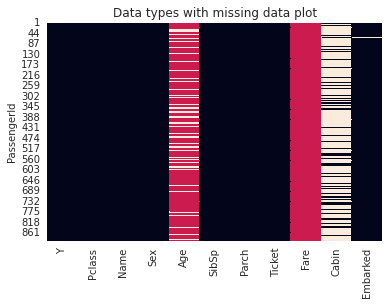

In [110]:
print("Dimension of dataframe:", data.shape)
print("Data type:", "\n", data.dtypes)
# Determine a column is categorical or numerical.
def variable_type(df, col, max_cat = 20): 
  if (df.dtypes[col] == 'float64' or (df.dtypes[col] == 'int64' and df[col].nunique() > max_cat)):
    return 'num' 
  else:
    return 'cat'
# with this output and check it manually
# -> write a statement of which variable is categorical and which is numerical
# in this dataset, we have numerical varibles: age and fare, while rest of them are categorical
col_type = {col: variable_type(data, col, 20) for col in data.columns}
heatmap = data.isnull()
for col, tp in col_type.items():
  if tp == "num":
    heatmap[col] = heatmap[col].apply(lambda x: 0.5 if x is False else 1)
  else:
    heatmap[col] = heatmap[col].apply(lambda x: 0 if x is False else 1) 
sns.heatmap(heatmap, cbar = False).set_title("Data types with missing data plot")
print("black", ": categorical data") 
print("cherryred", ": numerical data")
print("white", ": missing data")
numerical = [col for col, tp in col_type.items() if tp == "num"]
categorical = [col for col, tp in col_type.items() if tp == "cat"]

### Data analysis detailed visulization
numerical: distribution, box plot
categorical: bar plot

In [237]:
data = data.set_index('PassengerId')
data = data.rename(columns = {'Survived': 'Y'})

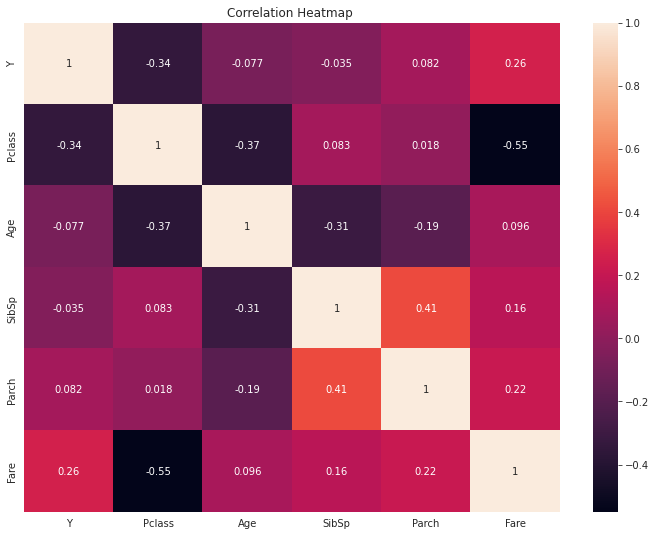

In [105]:
# correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap ")
plt.show()
# -> pclass and fare are negatively related to each ohter

#### Uni data analysis

##### Categorical 

In [137]:
categorical

['Y', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

#### Text data type

In [ ]:
# Take topic col as example
# can divide into sub category
# such as title length
data.topic.str.len().describe()

#### run model using best parameters

In [457]:
## train
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [458]:
# define classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest",
         "Naive Bayes", "QDA","LDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=3),
    GaussianNB(),
    QDA(),
    LDA()]

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)

Nearest Neighbors 0.7897081413210445 0.047875091385519986 0.7258064516129032
Linear SVM 0.7785714285714286 0.05042813817161183 0.6935483870967742
RBF SVM 0.8120839733742959 0.038669493144813 0.7258064516129032
Decision Tree 0.8105222734254992 0.033152975206879015 0.7580645161290323
Random Forest 0.8170250896057347 0.04021104707366282 0.7258064516129032
Naive Bayes 0.7543778801843317 0.04401147287189198 0.6612903225806451
QDA 0.7818484383000512 0.051350715785943794 0.6774193548387096
LDA 0.7913466461853558 0.05277987498408592 0.6774193548387096


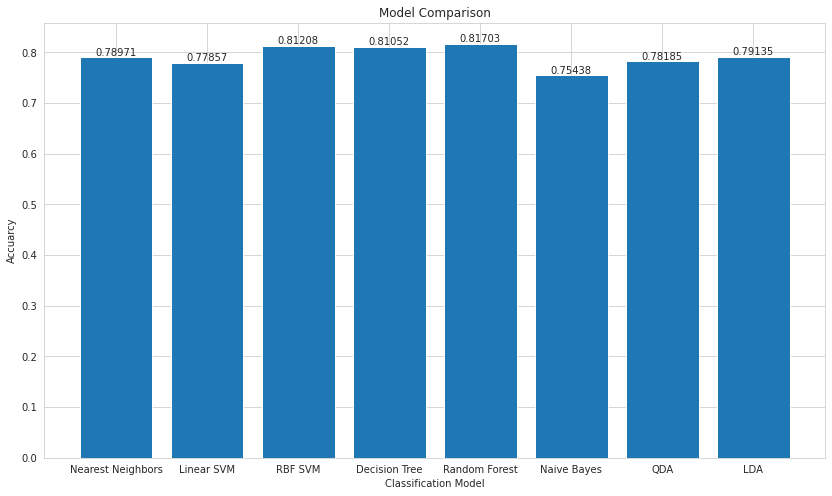

In [459]:
yasix = []
results = []
all_feature_perform =[]
for name, clf in zip(names, classifiers):
    s = cross_val_score(clf,X_train,y_train,cv = k_fold)
    results.append(s)
    yasix.append(s.mean())
    all_feature_perform.append(s.mean())
    print(name,s.mean(),s.std(),s.min())
    
# plot the accuarcy result 
plt.figure(figsize = (14,8))
plt.bar(names,yasix)
plt.xlabel("Classification Model")
plt.ylabel("Accuarcy")
plt.title("Model Comparison")
j = 0
for i in yasix:
    plt.annotate(round(i,5),xy=(names[j],yasix[j]),ha='center',va='bottom')
    j=j+1
plt.show()

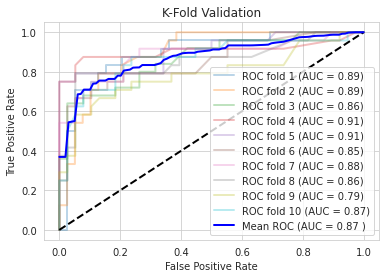

In [374]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
   prediction = model.fit(X_train[train],
                y_train[train]).predict_proba(X_train[test])
   fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
   tprs.append(scipy.interp(mean_fpr, fpr, tpr))
   roc_auc = metrics.auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
   i = i+1
   
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

##### cat vs num


In [264]:
"""
t test.
To evaluate the predictive power between 1 categorical and 1 numerical variable 
null hypothesis: on relation between the variables
PARAMETER
---------
  df, DataFrame
original data file
  x, string
name of one numerical variable
  y, string
name of one categorical variable
  aplha, double
significant value with default value of 0.05
RETURN
-------
  p_value, double
result of p value 
  state, string
shows to reject H0 or accept it
"""
def t_test (df, x, y , alpha = 0.05):
  model = smf.ols(x+'~'+y, data = df).fit()
  table = sm.stats.anova_lm(model)
  p = table["PR(>F)"][0]
  print("p value is " + str(p))
  if p <= alpha:
      print('Dependent (reject H0)')
  else:
      print('Independent (H0 holds true)')

In [265]:
t_test(data,'Age','Y', alpha=0.05)

p value is 0.03912465401348333
Dependent (reject H0)


In [266]:
features.append('Age')

In [267]:
t_test(data,'Fare','Y', alpha=0.05)

p value is 6.1201893419215696e-15
Dependent (reject H0)


In [268]:
features.append('Fare')

##### num vs num

In [ ]:
#x, y = "GrLivArea", "Y"
#dtf_noNan = dtf[dtf[x].notnull()]
#coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
#coeff, p = round(coeff, 3), round(p, 3)
#conclusion = "Significant" if p < 0.05 else "Non-Significant"
#print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

#### summary
generate summary of feature matrix
0. manually remove the valueless variables by background knowledge 
1. remove variable with many missing data if it can be substitute
2. add the one with predictive power

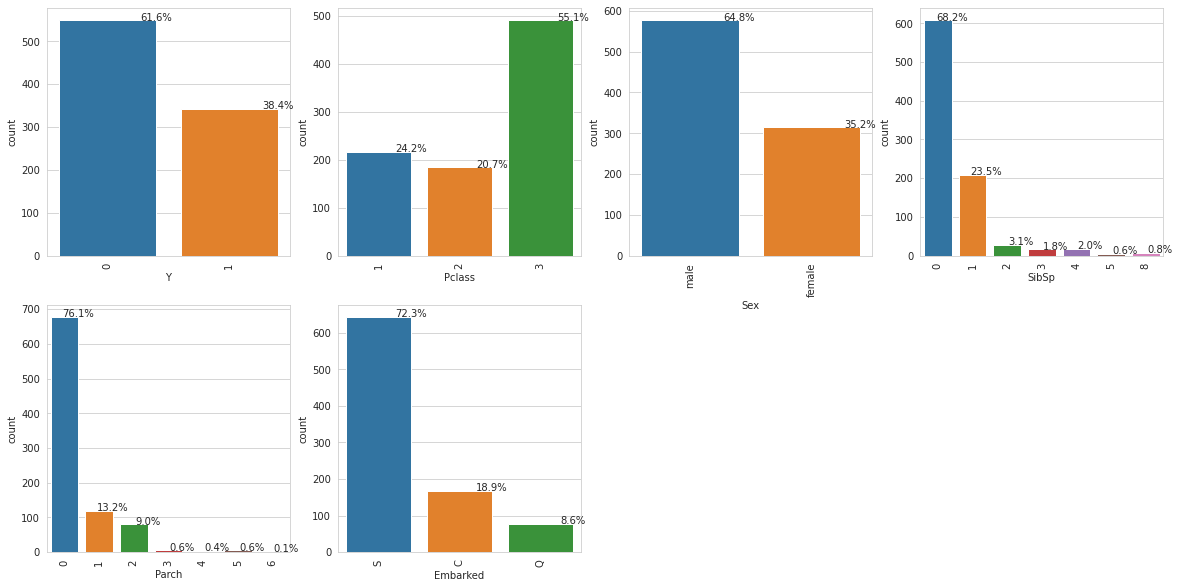

In [156]:
# categorical data using bar plots
# for those have less reponses
cat_sub_less = ['Y', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, ax = plt.subplots(2,4, figsize= (20,10))
for col, subplot in zip(cat_sub_less, ax.flatten()):
  total = float(len(data[col]))
  sns.countplot(data[col], ax=subplot)
  for label in subplot.get_xticklabels():
    label.set_rotation(90)
  for p in subplot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    subplot.annotate(percentage, (x, y), ha = 'center')
# remove empty plot
ax[1,2].set_axis_off()
ax[1,3].set_axis_off()

In [151]:
# for those have many reponses
cat_sub_more = list(set(categorical) - set(cat_sub_less))
cat_sub_more_drop = ['Ticket']
data[cat_sub_more_drop]

,Ticket
PassengerId,
1,A/5 21171
2,PC 17599
3,STON/O2. 3101282
4,113803
5,373450
...,...
887,211536
888,112053
889,W./C. 6607


##### Numerical

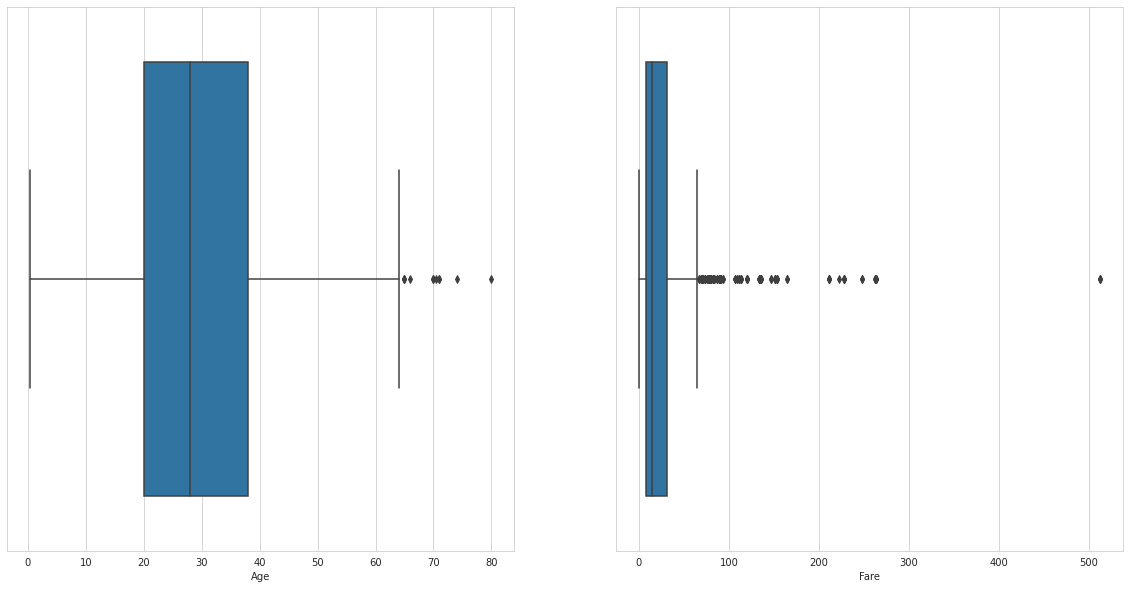

In [158]:
# numerical number: box plot
fig, ax = plt.subplots(1,2, figsize= (20,10))
for col, subplot in zip(numerical, ax.flatten()):
  sns.boxplot(data[col], ax=subplot)

In [176]:
# outlier close-up check
data[data['Fare'] > 500]
# if you think it is not reasonable and litte counts
fare_range = (0, 500)
newdata = data[data['Fare'].between(*fare_range,inclusive=True)]
newdata.shape

(888, 12)

#### Bi data analysis
to decide predict power
- categorical (Y) vs numerical (Age): t test
- categorical vs categorical: chi-square test
- numerical vs numerical: correlation test

##### cat vs cat

In [211]:
"""
Chi-squre test.
To evaluate the predictive power between 2 categorical variables
null hypothesis: on relation between the variables
PARAMETER
---------
  x, series
one categorical variable
  y, series
the other categorical variable
  aplha, double
significant value with default value of 0.05
RETURN
-------
  p_value, double
result of p value 
  state, string
shows to reject H0 or accept it
"""
def chi_test(x, y, aplha = 0.05):
  data = [[x,y]]
  stat, p, dof, expected = scipy.stats.chi2_contingency(sex_df)
  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
      print('Dependent (reject H0)')
  else:
      print('Independent (H0 holds true)')


In [240]:
x, y = 'Sex', 'Y'
dct = {'female': 1, 'male': 2}
lst = data[x]
data_sex = list(map(dct.get, lst))
chi_test(data_sex,data['Y'])

p value is 3.1195377605057268e-282
Dependent (reject H0)


In [223]:
features = []
features.append('Sex')

In [213]:
chi_test(data["Pclass"],data['Y'])

p value is 3.1195377605057268e-282
Dependent (reject H0)


In [224]:
features.append('Pclass')

In [214]:
chi_test(data["SibSp"],data['Y'])

p value is 3.1195377605057268e-282
Dependent (reject H0)


In [225]:
features.append('SibSp')

In [215]:
chi_test(data["Parch"],data['Y'])

p value is 3.1195377605057268e-282
Dependent (reject H0)


In [226]:
features.append('Parch')

In [219]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [220]:
x, y = 'Embarked', 'Y'
dct = {'S': 1, 'C': 2,'Q': 3}
lst = data[x]
data_em = list(map(dct.get, lst))
chi_test(data_em,data['Y'])

p value is 3.1195377605057268e-282
Dependent (reject H0)


In [227]:
features.append('Embarked')

## Feature engineering
extract features from raw data

In [432]:
features

['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [433]:
data_f = data[features + ['Y']]
data_f.head(1)

,Sex,Pclass,SibSp,Parch,Embarked,Age,Fare,Y
PassengerId,,,,,,,,
1,male,3,1,0,S,22.0,7.25,0


## Preprocesing
data partitioning, handle missing value, encode categorical variables, scale (make it ready for machine learning)
- each observationb must be represented by a signle row, feature matrix
- partitioned into training and test sets
- missing values should be replaced with something
- categorical data must be encoded
- scale data


#### Split data

In [434]:
## split data
df_train, df_test = model_selection.train_test_split(data_f, 
                      test_size=0.3)


### Missing value

In [419]:
'''
Replace Na with a specific value or mean for numerical and mode for categorical. 
'''
def fill_na(df, x, value=None):
    if value is None:
        value = df[x].mean() if x in numerical else df[x].mode().iloc[0]
        print(x)
        print("missng percentage: ", df[x].isnull().sum()*100/ len(df[x]))
        print(x,"--- Replacing Nas with:", value, "---")
        df[x] = df[x].fillna(value)
        return df, value
    else:
        print("--- Replacing Nas with:", value, "---")
        dtf[x] = df[x].fillna(value)
        return df


In [420]:
for col in df_train:
  fill_na(df_train, col)

Sex
missng percentage:  0.0
Sex --- Replacing Nas with: male ---
Pclass
missng percentage:  0.0
Pclass --- Replacing Nas with: 3 ---
SibSp
missng percentage:  0.0
SibSp --- Replacing Nas with: 0 ---
Parch
missng percentage:  0.0
Parch --- Replacing Nas with: 0 ---
Embarked
missng percentage:  0.16051364365971107
Embarked --- Replacing Nas with: S ---
Age
missng percentage:  20.064205457463885
Age --- Replacing Nas with: 29.893574297188756 ---
Fare
missng percentage:  0.0
Fare --- Replacing Nas with: 32.76779630818618 ---
Y
missng percentage:  0.0
Y --- Replacing Nas with: 0 ---


### Categorical data encoder
one-hot-encoder would transform the datfa to (n-1) dummy variables

In [398]:
'''
Transforms a categorical column into dummy columns
pay attention to if it has many subclass, need to find another way
:parameter
    :param dtf: dataframe - feature matrix dtf
    :param x: str - column name
    :param dropx: logic - whether the x column should be dropped
:return
    dtf with dummy columns added
'''
def add_dummies(df, x, dropx=True):
    df_dummy = pd.get_dummies(df[x], prefix=x, drop_first=True, dummy_na=False)
    df = pd.concat([df, df_dummy], axis=1)
    #print( df.filter(like=x, axis=1).head() )
    if dropx == True:
        df = df.drop(x, axis=1)
    return df
    

In [421]:
for col in cat_sub_less:
  if col in categorical and col != 'Y':
    df_train = add_dummies(df_train, col, True)

In [358]:
data.isnull().sum()

Y             0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [422]:
df_train.head(2)

,Age,Fare,Y,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
224,29.893574,7.8958,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,18.000000,13.0000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [423]:
df_train.isnull().sum()

Age           0
Fare          0
Y             0
Pclass_2      0
Pclass_3      0
Sex_male      0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Scale feature

In [424]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df_train.drop("Y", axis=1))
df_train_scaled= pd.DataFrame(X, columns=df_train.drop("Y", axis=1).columns, index=df_train.index)
df_train_scaled["Y"] = df_train["Y"]
df_train_scaled.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Y
PassengerId,,,,,,,,,,,,,,,,,,,,
224,0.398521,0.015412,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
418,0.236329,0.025374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
312,0.236329,0.512122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
691,0.413610,0.111257,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
490,0.113596,0.031035,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Feature selection
keep only the most relevant variables to build machine learning model. t makes the model easier to interpret and reduces overfitting (when the model adapts too much to the training data and performs badly outside the train set).
I already did a first “manual” feature selection during data analysis by excluding irrelevant columns. Now it’s going to be a bit different because we assume that all the features in the matrix are relevant and we want to drop the unnecessary ones. When a feature is not necessary? Well, the answer is easy: when there is a better equivalent, or one that does the same job but better.

In [ ]:
# use lasso regurization and random forest to select important variables


#### preprocess test data

In [405]:
for col in df_test:
  fill_na(df_test, col)

Sex
missng percentage:  0.0
Sex --- Replacing Nas with: male ---
Pclass
missng percentage:  0.0
Pclass --- Replacing Nas with: 3 ---
SibSp
missng percentage:  0.0
SibSp --- Replacing Nas with: 0 ---
Parch
missng percentage:  0.0
Parch --- Replacing Nas with: 0 ---
Embarked
missng percentage:  0.0
Embarked --- Replacing Nas with: S ---
Age
missng percentage:  18.65671641791045
Age --- Replacing Nas with: 29.202981651376145 ---
Fare
missng percentage:  0.0
Fare --- Replacing Nas with: 33.22604104477613 ---
Y
missng percentage:  0.0
Y --- Replacing Nas with: 0 ---


In [406]:
for col in cat_sub_less:
  if col in categorical and col != 'Y':
    df_test= add_dummies(df_test, col, True)

In [407]:
df_test.head(2)

,Age,Fare,Y,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_5,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
206,2.0,10.4625,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
132,20.0,7.0500,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [408]:
df_test.index

Int64Index([206, 132, 811, 789, 580, 766, 311, 315, 338, 209,
            ...
             91, 697, 373, 657, 612, 496, 231, 104,  71, 749],
           dtype='int64', name='PassengerId', length=268)

In [409]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df_test.drop("Y", axis=1))
df_test_scaled= pd.DataFrame(X, columns=df_test.drop("Y", axis=1).columns, index=df_test.index)
df_test_scaled["Y"] = df_test["Y"]
df_test_scaled.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_5,Embarked_Q,Embarked_S,Y
PassengerId,,,,,,,,,,,,,,,,,
206,0.017794,0.020421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
132,0.274021,0.013761,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
811,0.359431,0.015395,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
789,0.003559,0.040160,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
580,0.444840,0.015469,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


#### Random Forest select data

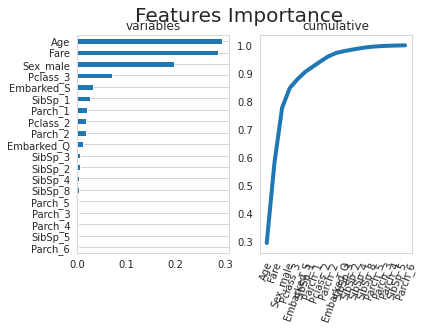

In [451]:
X = df_train_scaled.drop("Y", axis=1).values
y = df_train_scaled["Y"].values
feature_names = df_train_scaled.drop("Y", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
df_importances['cumsum'] =  df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), 
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

### training and testing data ready for ML model

In [452]:
names = ['Age','Fare','Sex_male','Pclass_3','Embarked_S','SibSp_1','Parch_1','Pclass_2','Parch_2','Embarked_Q']

In [454]:
X_train = df_train_scaled[names].values
y_train = df_train_scaled["Y"].values
X_test = df_test_scaled[names].values
y_test = df_test_scaled["Y"].values

In [455]:
print(X_train.shape)
print(X_test.shape)

(623, 10)
(268, 10)


## Model design
train, tune hyperparameters, validation, test

I suggest to always try a gradient boosting algorithm (like XGBoost). It’s a machine learning technique that produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. Basically it’s similar to a Random Forest with the difference that every tree is fitted on the error of the previous one.

#### hyperparameter tuning

In [456]:
# find best parameters
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250],  #number of trees added to the model
'max_depth':[2,3],    #maximum depth of the tree
'min_samples_split':[6,8,10],    #sets the minimum number of samples to split
'min_samples_leaf':[3,5,7],     #the minimum number of samples to form a leaf
'max_features':[2,3,4],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=50, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.75, 'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 2, 'learning_rate': 0.15}
Best Model mean accuracy: 0.8410322580645161


## Performance evaluation
read the metrics

In [460]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.84
Auc: 0.9
Recall (all 1s predicted right): 0.71
Precision (confidence when predicting a 1): 0.88
Detail:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       158
           1       0.88      0.71      0.78       110

    accuracy                           0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



## Explainability
understand how the model produces result


In [466]:
print("True:", y_test[10], "--> Pred:", predicted[10], "| Prob:", np.max(predicted_prob[4]))

True: 1 --> Pred: 1 | Prob: 0.12289310794995449


In [ ]:
!pip install shap
import shap

In [477]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

# Cheat Sheet

## Cheat sheet - PPDS

In [ ]:
# cheat sheet from PPDS book
# type of an object
type()
# string methods
stringName.split()
# inline if/else
words = ["the","list","of","words"]
x = "long list" if len(words) > 10 else "short list"
# for loop
for i in range(3):
  print(list_1[i])
# enumerate() adds a counter to an iterable 
list_2 = ["a", "b", "c"]
for i in enumerate(list_2):
  print(i)
# string print format
for n, i in enumerate(list_2):
  print(f"index {n}, value {i}")
# function 
def add_one(x):
  return x+1
add_one(7.2)
# lambda function
add_one = lambda x: x+1
# time and memory use
start = time.time()
mem = memory_profiler.memory_useage()
print(f"Memory useage before: {mem[0]:.0f} mb")
people = house_list(5000000)
print(f"Memory usage after: {memory_profiler.memory_usage()[0]:.0f mb}")
print(f"Time taken: {time.time() - start:.2f}s")
# Docstring Structure
def function_name(param1, param2, param3):
  """First line is a short description of the function.

  A paragraph describing in a bit more detial what the function
  does and what algorithm it uses and common use case.

  Parameters
  ----------
  param1: datatype
    A description of param1

  Returns
  -------
  datatype
    A desciption of the output, datatype and behaviors. 
  """

## Cheat sheet - python ds handbook

In [1]:
# Cheat sheet from python data science handbook
# feature engineering: features for representing categorical data, text and image (vectorization)
## categorical features (its numerical features not reflect algebraic quantities)
# one-hot encoding
dct = {'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}
lst = ['Queen Anne','Queen Anne','Wallingford']
mytest = list(map(dct.get, lst))
print(mytest)
data = [
               {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
               {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
               {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
               {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
# if data is a list of dictionaries
from sklearn.feature_extraction import DictVectorizer 
vec = DictVectorizer(sparse=False, dtype=int) 
print(vec.fit_transform(data))

[1, 1, 3]
[[     0      1      0 850000      4]
 [     1      0      0 700000      3]
 [     0      0      1 650000      3]
 [     1      0      0 600000      2]]


## Web resource

1. classification of titanic data
https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
- Environment setup: import libraries and read data
- Data Analysis: understand the meaning and the predictive power of the variables
- Feature engineering: extract features from raw data
- Preprocessing: data partitioning, handle missing values, encode categorical variables, scale
- Feature Selection: keep only the most relevant variables
- Model design: train, tune hyperparameters, validation, test
- Performance evaluation: read the metrics
- Explainability: understand how the model produces results

In [ ]:
###environment setup#######
# for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
dtf = pd.read_csv('data_titanic.csv')
dtf.head()
# before that need to confirm each rowe represents an observation

### data analysis########
# get overview of the whole dataset
# such as how many categorical and numerical variables
# porportion of missing data
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")
# each row of the table represents a specific passenger, so set as index (primary key or the table)
# want to understand the prediction rename it as Y
dtf = dtf.set_index("PassengerId")
dtf = dtf.rename(columns={"Survived":"Y"})
# visualization is the best tool for data analysis but need to know what kind of plots are more suitable for different types
# numerical: historgram for density of the underlying distribution and box plot to graphicallky depiot groups through their quartiles; categorical: bar plot
# caetgorical
y = "Y"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()
# numerical 
x = "Age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()
# explain for this plot
# The passengers were, on average, pretty young: the distribution is skewed towards the left side (the mean is 30 y.o and the 75th percentile is 38 y.o.). Coupled with the outliers in the box plot, the first spike in the left tail says that there was a significant amount of children.
# take the analysis to the next level to into bivariate distrbution to undertand if age has predictive power to predict Y
# if the distribution are different then the variable is predictive because the two groups have different patterns
cat, num = "Y", "Age"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()
# explain for this plot
# These 3 plots are just different perspectives of the conclusion that Age is predictive. The survival rate is higher for younger passengers: there is a spike in the left tail of 1s distribution and the first bin (0–16 y.o.) contains the highest percentage of survived passengers.
# when not convinced by the "eye intuition", you can always resort to good old statistics
# categorical (Y 0 or 1) vs numerical (Age) use one-way ANOVA test
cat, num = "Y", "Age"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")
# Apparently the passengers' age contributed to determine their survival. That makes sense as the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited (the “women and children first” code).
# categorical (Y) vs categorical (sex): count bax plot and precentage box plot
x, y = "Sex", "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### count
ax[0].title.set_text('count')
order = dtf.groupby(x)[y].count().index.tolist()
sns.catplot(x=x, hue=y, data=dtf, kind='count', order=order, ax=ax[0])
ax[0].grid(True)
### percentage
ax[1].title.set_text('percentage')
a = dtf.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = dtf.groupby([x,y])[y].count()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b,
            ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()
# More than 200 female passengers (75% of the total amount of women onboard) and about 100 male passengers (less than 20%) survived. To put it another way, among women the survival rate is 75% and among men is 20%, therefore Sex is predictive. Moreover, this confirms that they gave priority to women and children.
# categorical (Y) vs categorical (sex): chi-square test
#  assuming that two variables are independent (null hypothesis), it tests whether the values of the contingency table for these variables are uniformly distributed. If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent. 
x, y = "Sex", "Y"
cont_table = pd.crosstab(index=dtf[x], columns=dtf[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")
# conclusion of useful data variables
# Age and Sex are examples of predictive features, but not all of the columns in the dataset are like that. For instance, Cabin seems to be a useless variable as it doesn’t provide any useful information, there are too many missing values and categories.

###feature engineering######
# create new features from raw data using domain knowledge
# I’ll try to create a useful feature by extracting information from the Cabin column. I’m assuming that the letter at the beginning of each cabin number (i.e. “B96”) indicates some kind of section, maybe there were some lucky sections near to lifeboats. I will summarize the observations in clusters by extracting the section of each cabin:
## Create new column
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])
## Plot contingency table
cont_table = pd.crosstab(index=dtf["Cabin_section"], 
             columns=dtf["Pclass"], values=dtf["Y"], aggfunc="sum")
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Cabin_section vs Pclass (filter: Y)' )
# explain to this plot
# This plot shows how survivors are distributed among cabin sections and classes (7 survivors are in section A, 35 in B, …). Most of the sections are assigned to the 1st and the 2nd classes, while the majority of missing sections (“n”) belongs to the 3rd class.

###preprocessing########
# preparing the raw data to make it suitable for machine learning model
# 1. each observation must be represented by a single row (feature matrix)
# 2. dataset must be partitioned into at least two sets: train set and test set
# 3. missing values should be replaced with something
# 4. categorical data: must be encodeed by converting labels into integers, becaus ml expects numbers not strings
# 5.it is good practice to scale the data, it helps to normalize the data within a particular range and speed up the calculations in an algorithm.
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())
# missing data
# you can replace missing data with a specific value, like 9999, that keeps trace of the missing information but change the variable distribution
# alternatively, you can use the average of the column
# use the average of the column from training dataset only, first split then 
dtf_train["Age"] = dtf_train["Age"].fillna(dtf_train["Age"].mean())
# vectorize of categoricalo data
# he two most common encoders are the Label-Encoder (each unique label is mapped to an integer) and the One-Hot-Encoder (each label is mapped to a binary vector). The first one is suited for data with ordinality only. If applied to a column with no ordinality, like Sex, it would turn the vector [male, female, female, male, …] into [1, 2, 2, 1, …] and we would have that female > male and with an average of 1.5 which makes no sense. On the other hand, the One-Hot-Encoder would transform the previous example into two dummy variables (dichotomous quantitative variables): Male [1, 0, 0, 1, …] and Female [0, 1, 1, 0, …]. It has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space, but features with high cardinality can lead to a dimensionality issue. I shall use the One-Hot-Encoding method, transforming 1 categorical column with n unique values into n-1 dummies. Let’s encode Sex as an example:
## create dummy
dummy = pd.get_dummies(dtf_train["Sex"], 
                       prefix="Sex",drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="Sex", axis=1).head() )
## drop the original categorical column
dtf = dtf_train.drop("Sex", axis=1)
# scale the features
# most used ones: the Standard-Scaler and the MinMax-Scaler. The first one assumes data is normally distributed and rescales it such that the distribution centres around 0 with a standard deviation of 1. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values, therefore this scaler can’t guarantee balanced feature scales in the presence of outliers. On the other hand, the MinMax-Scaler rescales the data set such that all feature values are in the same range (0–1). It is less affected by outliers but compresses all inliers in a narrow range. Since my data is not normally distributed, I’ll go with the MinMax-Scaler:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", axis=1).columns, index=dtf_train.index)
dtf_scaled["Y"] = dtf_train["Y"]
dtf_scaled.head()

###feature selection#######
# Feature selection is the process of selecting a subset of relevant variables to build the machine learning model. It makes the model easier to interpret and reduces overfitting (when the model adapts too much to the training data and performs badly outside the train set).
# first step to manualk feature selection, then is not backaground knowledge. if there is a better equivalent, or one does the same job but better
# I’ll explain with an example: Pclass is highly correlated with Cabin_section because, as we’ve seen before, certain sections were located in 1st class and others in the 2nd. Let’s compute the correlation matrix to see it:
orr_matrix = dtf.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")
# One among Pclass and Cabin_section could be unnecessary and we may decide to drop it and keep the most useful one (i.e. the one with the lowest p-value or the one that most reduces entropy).
# then also two ways of  atuomatic feature selection: first I will use a regularization method and compare it with the ANOVA test already mentioned before, then I will show how to get feature importance from ensemble methods.
# LASSO regularization is a regression analysis method that performs both variable selection and regularization in order to enhance accuracy and interpretability.
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)
# explain to this plot 
The blue features are the ones selected by both ANOVA and LASSO, the others are selected by just one of the two methods.
# Random forest is an ensemble method that consists of a number of decision trees in which every node is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. Features importance is computed from how much each feature decreases the entropy in a tree.
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  
            dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
    dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()
# Personally, I always try to use less features as possible, so here I select the following ones and proceed with the design, train, test and evaluation of the machine learning model:
X_names = ["Age", "Fare", "Sex_male", "SibSp", "Pclass_3", "Parch",
"Cabin_section_n", "Embarked_S", "Pclass_2", "Cabin_section_F", "Cabin_section_E", "Cabin_section_D"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

###model design#######
# I suggest to always try a gradient boosting algorithm (like XGBoost). It’s a machine learning technique that produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. Basically it’s similar to a Random Forest with the difference that every tree is fitted on the error of the previous one.
# There a lot of hyperparameters and there is no general rule about what is best, so you just have to find the right combination that fits your data better. You could do different tries manually or you can let the computer do this tedious job with a GridSearch (tries every possible combination but takes time) or with a RandomSearch (tries randomly a fixed number of iterations)
# . I’ll try a RandonSearch for my hyperparameter tuning: the machine will iterate n times (1000) through training data to find the combination of parameters (specified in the code below) that maximizes a scoring function used as KPI (accuracy, the ratio of the number of correct predictions to the total number of input samples):
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=1000, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_
# Cool, that’s the best model, with a mean accuracy of 0.85, so probably 85% of predictions on the test set will be correct.
# We can also validate this model using a k-fold cross-validation, a procedure that consists in splitting the data k times into train and validation sets and for each split the model is trained and tested. It’s used to check how well the model is able to get trained by some data and predict unseen data.
# I’d like to clarify that I call validation set a set of examples used to tune the hyperparameters of a classifier, extracted from splitting training data. On the other end, a test set is a simulation of how the model would perform in production when it’s asked to predict observations never seen before.
# It’s common to plot a ROC curve for every fold, a plot that illustrates how the ability of a binary classifier changes as its discrimination threshold is varied. It is created by plotting the true positive rate (1s predicted correctly) against the false positive rate (1s predicted that are actually 0s) at various threshold settings. The AUC (area under the ROC curve) indicates the probability that the classifier will rank a randomly chosen positive observation (Y=1) higher than a randomly chosen negative one (Y=0).
# Now I’ll show an example of with 10 folds (k=10):
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
   prediction = model.fit(X_train[train],
                y_train[train]).predict_proba(X_train[test])
   fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
   tprs.append(scipy.interp(mean_fpr, fpr, tpr))
   roc_auc = metrics.auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = 
            %0.2f)' % (i, roc_auc))
   i = i+1
   
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = 
         %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()
# explain to this plot
# According to this validation, we should expect an AUC score around 0.84 when making predictions on the test.
# For the purpose of this tutorial I’d say that the performance is fine and we can proceed with the model selected by the RandomSearch. Once that the right model is selected, it can be trained on the whole train set and then tested on the test set.
## train
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)
# In the code above I made two kinds of predictions: the first one is the probability that an observation is a 1, and the second is the prediction of the label (1 or 0). To get the latter you have to decide a probability threshold for which an observation can be considered as 1, I used the default threshold of 0.5.

###Evaluation####
# I’ll evaluate the model using the following common metrics: Accuracy, AUC, Precision and Recall. I already mentioned the first two, but I reckon that the others are way more important. Precision is the fraction of 1s (or 0s) that the model predicted correctly among all predicted 1s (or 0s), so it can be seen as a sort of confidence level when predicting a 1 (or a 0). Recall is the portion of 1s (or 0s) that the model predicted correctly among all 1s (or 0s) in the test set, basically it’s the true 1 rate. Combining Precision and Recall with an armonic mean, you get the F1-score.
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))   
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))
# explain to print outcome 
# As expected, the general accuracy of the model is around 85%. It predicted 71% of 1s correctly with a precision of 84% and 92% of 0s with a precision of 85%. In order to understand these metrics better, I’ll break down the results in a confusion matrix:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()
# Choosing a threshold of 0.5 to decide whether a prediction is a 1 or 0 led to this result. Would it be different with another one? Definitely yes, but there is no threshold that would bring the top score on both precision and recall, choosing a threshold means to make a compromise between these two metrics. I’ll show what I mean by plotting the ROC curve and the precision-recall curve of the test result:
classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2)
## plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)
roc_auc = metrics.auc(fpr, tpr)     
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
ax.legend(loc="lower right")
ax.grid(True)
## annotate ROC thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
     t = np.round(t,1)
     if t not in thres_in_plot:
         ax.annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), 
              textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
     else:
         next
## plot P-R curve
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
         ax.annotate(np.round(t,1), xy=(recalls[i],precisions[i]), 
               xytext=(recalls[i],precisions[i]), 
               textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
    else:
         next
plt.show()
# explain to this plot 
# Every point of these curves represents a confusion matrix obtained with a different threshold (the numbers printed on the curves). I could use a threshold of 0.1 and gain a recall of 0.9, meaning that the model would predict 90% of 1s correctly, but the precision would drop to 0.4, meaning that the model would predict a lot of false positives. So it really depends on the type of use case and in particular whether a false positive has an higher cost of a false negative.
# When the dataset is balanced and metrics aren’t specified by project stakeholder, I usually choose the threshold that maximize the F1-score. Here’s how:
## calculate scores for different thresholds
dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
        dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
dic_scores["precision"].append(metrics.precision_score(yy_test, predicted))
dic_scores["recall"].append(metrics.recall_score(yy_test, predicted))
dic_scores["f1"].append(metrics.f1_score(yy_test, predicted))       
## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))    
dtf_scores.plot(ax=ax, title="Threshold Selection")
plt.show()
# Before moving forward with the last section of this long tutorial, I’d like to say that we can’t say that the model is good or bad yet. The accuracy is 0.85, is it high? Compared to what? You need a baseline to compare your model with. Maybe the project you’re working on is about building a new model to replace an old one that can be used as baseline, or you can train different machine learning models on the same train set and compare the performance on a test set.

###Explainability##########

In [ ]:
# You analyzed and understood the data, you trained a model and tested it, you’re even satisfied with the performance. You think you’re done? Wrong. High chance that the project stakeholder doesn’t care about your metrics and doesn’t understand your algorithm, so you have to show that your machine learning model is not a black box.
# The Lime package can help us to build an explainer. To give an illustration I will take a random observation from the test set and see what the model predicts:
print("True:", y_test[4], "--> Pred:", predicted[4], "| Prob:", np.max(predicted_prob[4]))
# The model thinks that this observation is a 1 with a probability of 0.93 and in fact this passenger did survive. Why? Let’s use the explainer:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names=np.unique(y_train), mode="classification")
explained = explainer.explain_instance(X_test[4], model.predict_proba, num_features=10)
explained.as_pyplot_figure()
# The main factors for this particular prediction are that the passenger is female (Sex_male = 0), young (Age ≤ 22) and traveling in 1st class (Pclass_3 = 0 and Pclass_2 = 0).
# The confusion matrix is a great tool to show how the testing went, but I also plot the classification regions to give a visual aid of what observations the model predicted correctly and what it missed. In order to plot the data in 2 dimensions some dimensionality reduction is required (the process of reducing the number of features by obtaining a set of principal variables). I will give an example using the PCA algorithm to summarize the data into 2 variables obtained with linear combinations of the features.
## PCA
pca = decomposition.PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
## train 2d model
model_2d = ensemble.GradientBoostingClassifier()
model_2d.fit(X_train, y_train)
    
## plot classification regions
from matplotlib.colors import ListedColormap
colors = {np.unique(y_test)[0]:"black", np.unique(y_test)[1]:"green"}
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop=X_test[:,0].max()+1, step=0.01),
np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step=0.01))
fig, ax = plt.subplots()
Y = model_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Y, alpha=0.5, cmap=ListedColormap(list(colors.values())))
ax.set(xlim=[X1.min(),X1.max()], ylim=[X2.min(),X2.max()], title="Classification regions")
for i in np.unique(y_test):
    ax.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
               c=colors[i], label="true "+str(i))  
plt.legend()
plt.show()

plots: https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d